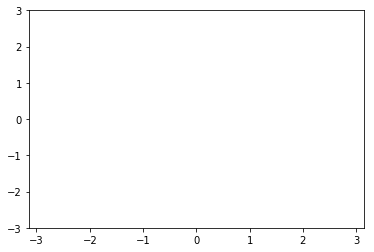

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Thu Oct 11 14:30:09 2018

@author: Cerx
"""


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib.animation as animation

ti = 0
tf = 10*np.pi
h = 0.1
t = np.arange(ti,tf,h)
i = len(t)

l = 1
r = 0.25
w0 = 0
wd = 2/3
a = 0.7


fig, ax = plt.subplots()
ax.set_xlim([-np.pi,np.pi])
ax.set_ylim([-3,3])

phi_points = []
omega_points = []
phis = []
omegas = []

phi0 = np.pi/2
omega0 = w0
counter = 0

ar = np.array([phi0,omega0],float)

def f(ar,time):
    phi = ar[0]
    omega = ar[1]
    #fomega = -np.sin(phi)
    #fomega = -r*omega -np.sin(phi)
    fomega = -r*omega -np.sin(phi) + a*np.cos(wd*time)
    return np.array([omega,fomega],float)

def rk4(ar,h,time):
    k1 = h*f( ar ,time)
    k2 = h*f( ar + 0.5*k1 ,time)
    k3 = h*f( ar + 0.5*k2 ,time)
    k4 = h*f( ar + k3 ,time)
    return (k1 + 2*k2 + 2*k3 + k4)/6

'''
for time in t:
    ar += rk4(ar,h,time)
    ar[0] %= 2*np.pi
    #ar[0] = ((ar[0]/2/np.pi + 100.5) % 1.)*ar[0]
    #ar[1] /= 10 
    phi_points.append(ar[0])
    omega_points.append(ar[1])

plt.plot(phi_points,omega_points)
'''
def init():
    line, = ax.plot(phi_points, omega_points, color = 'orange')
    return line,

def animate(i):
    
    time = t[i]
    global ar
    ar += rk4(ar,h,time)
    if ar[0] < -np.pi:
        ar[0] += 2*np.pi
    elif ar[0] > np.pi:
        ar[0] -= 2*np.pi
    phi_points.append(ar[0])
    omega_points.append(ar[1])
    line, = ax.plot(phi_points, omega_points, color = 'orange', marker = ',')
    return line,

anim = animation.FuncAnimation(
        fig, animate, init_func = init, frames = i, interval = 20, repeat = True, blit = True
        )
plt.show()

In [9]:
HTML(anim.to_html5_video())